# Загрузка модулей

In [25]:
from random import random

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression, LinearRegression, LogisticRegressionCV, SGDClassifier

from sklearn.svm import SVC, LinearSVC, NuSVC

from sklearn.metrics import f1_score, classification_report, confusion_matrix

from sklearn.model_selection import KFold, RandomizedSearchCV, GridSearchCV, cross_val_score, train_test_split

from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import pandas as pd
imoprt numpy as np


SyntaxError: invalid syntax (Temp/ipykernel_21560/161609229.py, line 25)

# Загрузка данных

In [17]:
from msilib.schema import RadioButton


data = pd.read_csv('train.csv')
# cols = data.columns
data_X = data.iloc[:,  0:-1]
data_y = data['target']
data_predict = pd.read_csv('test.csv')

# Убираем 5 столбец
data_X_no5col = data_X.drop(columns=['5'])
data_predict_no5col = data_predict.drop(columns=['5'])

kf_5 = KFold(n_splits=5, shuffle=True, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(data_X_no5col, data_y, shuffle=True, random_state=0)

In [6]:
data_X_no5col

,0,1,2,3,4,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,-6.130724,7.429628,3.651437,-1.950971,-3.384415,-3.077774,-2.619091,5.128201,1.228476,-2.030674,...,-0.565067,0.392978,4.920467,16.610460,-2.430804,-1.405573,18.610209,-4.140715,6.027816,-20.288145
1,5.161836,-6.514011,-7.474612,-4.544336,-13.081404,-1.094672,-1.253545,-2.955342,-10.958200,0.201764,...,3.433538,-4.840233,-0.514308,4.613289,2.391302,-4.795664,4.208278,-2.017168,-8.510424,10.806639
2,-2.971550,-21.508184,-1.125457,1.524129,3.027444,1.551050,1.512075,-1.955564,3.683893,-3.281620,...,-1.659274,-0.385303,2.647917,-2.200556,1.058671,1.076312,-7.802389,-7.553953,0.636639,14.274950
3,6.724419,0.566489,0.509764,-4.524162,10.367236,0.741790,-2.077787,-2.912744,-4.040637,0.966362,...,3.270839,4.731346,15.378418,-14.031666,2.659410,5.123620,-8.500321,3.417960,-14.798490,-6.132800
4,-2.213659,-4.678213,-0.135845,2.375933,0.916649,-0.353265,-0.220609,-3.416823,-5.964181,0.166999,...,-10.292197,1.598330,-4.996614,4.504269,1.918961,-2.076223,0.154039,-2.016779,10.803205,5.942927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6958,1.554111,2.018845,-2.550991,-2.049014,0.931923,2.260598,0.907393,0.559868,-0.366525,6.499142,...,17.651213,-2.078071,2.774934,-5.819371,-1.397282,0.629832,-1.098601,-7.498520,-7.752161,12.691050
6959,5.341612,-4.057497,0.712336,-0.529023,2.389152,-4.248458,-2.516312,1.612912,0.088317,2.257982,...,9.199936,-0.120301,-3.247273,-3.348203,2.651849,1.059434,-2.842064,-1.960203,-5.095832,-0.174943
6960,-2.348591,-8.263995,-0.318484,1.851011,-4.880470,-4.348202,2.937274,-3.067852,-0.173702,-3.446411,...,-8.176217,0.819033,0.794195,9.353774,-1.841798,-1.116251,6.708149,-1.841971,5.747190,-7.608288
6961,5.481595,4.899412,-0.421851,4.639328,-20.671090,-3.838050,0.622003,1.548813,-8.847505,0.864090,...,-6.607413,1.697137,-8.315975,6.149865,1.437154,-7.284716,4.566744,-0.908937,11.555781,2.889093


In [3]:
data_y

0       0
1       0
2       0
3       1
4       0
       ..
6958    0
6959    0
6960    0
6961    0
6962    1
Name: target, Length: 6963, dtype: int64

# Дополнительные функции

In [10]:
def evaluate_clf(pipe: Pipeline, X_train, y_train, X_test, y_test):
    pipe.fit(X_train, y_train)
    y_train_p = pipe.predict(X_train)
    y_test_p = pipe.predict(X_test)
    print('TRAIN')
    print(classification_report(y_train, y_train_p))
    print('TEST')
    print(classification_report(y_test, y_test_p))
    
    cmx = confusion_matrix(y_test, y_test_p)
    print(cmx)
    # plt.imshow(cmx, cmap=plt.cm.gray)

    return pipe


def grid_search_pipe(pipe:Pipeline, params, X_train, y_train, X_test, y_test):
    print('BEFORE GRID SEARHC')       
    evaluate_clf(pipe, X_train, y_train, X_test, y_test)
    
    grid = GridSearchCV(pipe, param_grid=params, refit = True, verbose = 1, scoring='f1')
    grid.fit(X_train, y_train)
    
    # print best parameter after tuning
    print('BEST PARAMS:', grid.best_params_)
    # print how our model looks after hyper-parameter tuning
    print('BEST ESTIMATOR:', grid.best_estimator_)

    print('BEFORE GRID SEARCH')       
    evaluate_clf(grid.best_estimator_, X_train, y_train, X_test, y_test)
    cross_val_score(grid.best_estimator_, X_train, y_train, scoring='f1')

# Простой классификатор по 5 признаку

In [4]:
def func(ar:list):
    res = []
    a1 = 1.6486205286342552
    a2 = 1.6469322124181416
    a = (a2 + a1) / 2
    for i in ar:
        if i < a:
            res.append(0)
        else:
            res.append(1)

    return res


res = func(data_predict['5'].to_numpy())

array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

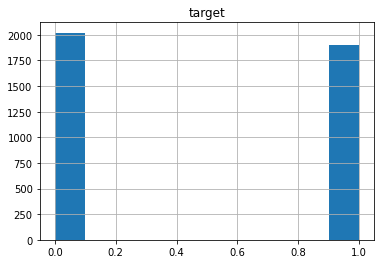

In [5]:
df_output = pd.DataFrame({'target':res})
df_output.to_csv('a04_20220819.csv')
df_output.hist()
# score 0.4686192468619247 :(

# Убираем столбец 5

In [34]:
pipe = Pipeline([
    ('scaller', StandardScaler()), 
    ('logit', LogisticRegressionCV(cv=5, random_state=0, max_iter=200, n_jobs=-1, scoring='f1', solver='liblinear', penalty='l2', tol=1e-100))
    ])

pipe.fit(X_train, y_train)
est = pipe[-1]
est.scores_, est.coef_

({1: array([[0.00651466, 0.        , 0.01311475, 0.01311475, 0.01311475,
          0.01311475, 0.01311475, 0.01311475, 0.01311475, 0.01311475],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ]])},
 array([[ 1.73288405e-02, -3.28622247e-02,  1.02011828e-02,
          4.00447247e-02,  3.29855448e-02, -3.37714791e-03,
         -9.77342371e-03,  4.79106035e-03,  4.23358338e-02,
         -1.63243540e-02, -2.70016640e-02,  3.60651291e-02,
         -1.66862323e-02, -3.59820388e-02,  2.476

Вывод - линеные моедели не работают

## Random Forest

TRAIN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3718
           1       1.00      1.00      1.00      1504

    accuracy                           1.00      5222
   macro avg       1.00      1.00      1.00      5222
weighted avg       1.00      1.00      1.00      5222

TEST
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1245
           1       0.97      0.47      0.64       496

    accuracy                           0.85      1741
   macro avg       0.90      0.73      0.77      1741
weighted avg       0.87      0.85      0.83      1741

[[1238    7]
 [ 262  234]]


Pipeline(steps=[('scaller', StandardScaler()),
                ('logit', RandomForestClassifier())])

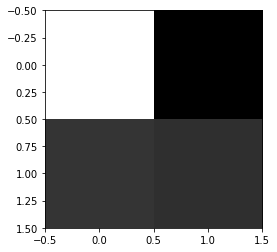

In [39]:
pipe = Pipeline([
    ('scaller', StandardScaler()), 
    ('logit', RandomForestClassifier())
    ])
evaluate_clf(pipe, X_train, y_train, X_test, y_test)

In [41]:
pipe = Pipeline([
    ('scaller', StandardScaler()), 
    ('logit', RandomForestClassifier())
    ])
cross_val_score(pipe, data_X_no5col, data_y, cv=kf_5, scoring='f1')

array([0.66101695, 0.62932455, 0.68227425, 0.62541806, 0.66450567])

In [ ]:
pipe.fit(data_X_no5col, data_y)
y_p = pipe.predict(data_predict_no5col)
df_output = pd.DataFrame({'target': y_p})
df_output.to_csv('a06_20220819.csv')

## KNN

score 0.81044957472661

без f1 метрики

TRAIN
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      3718
           1       0.96      0.80      0.88      1504

    accuracy                           0.93      5222
   macro avg       0.94      0.89      0.92      5222
weighted avg       0.94      0.93      0.93      5222

TEST
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1245
           1       0.91      0.71      0.80       496

    accuracy                           0.90      1741
   macro avg       0.90      0.84      0.87      1741
weighted avg       0.90      0.90      0.89      1741

[[1212   33]
 [ 144  352]]


Pipeline(steps=[('scaller', StandardScaler()),
                ('logit', KNeighborsClassifier())])

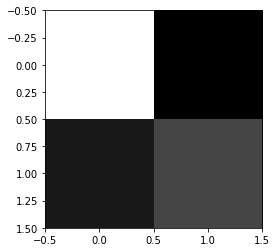

In [42]:
pipe = Pipeline([
    ('scaller', StandardScaler()), 
    ('logit', KNeighborsClassifier())
    ])

evaluate_clf(pipe, X_train, y_train, X_test, y_test)

если использовать метрику f1 получается такой score

In [43]:
cross_val_score(pipe, data_X_no5col, data_y, cv=kf_5, scoring='f1')

array([0.80232558, 0.80325645, 0.79351032, 0.80285714, 0.79888268])

score 0.7095238095238096 - работае хуже, если добавить 5 колонку.

In [45]:
pipe = Pipeline([
    ('scaller', StandardScaler()), 
    ('logit', KNeighborsClassifier())
    ])
print(cross_val_score(pipe, data_X, data_y, cv=kf_5))
pipe.fit(data_X, data_y)
y_p = pipe.predict(data_predict)
df_output = pd.DataFrame({'target': y_p})
df_output.to_csv('a05_202208192142_knn_all.csv')


[0.965542   0.96697775 0.97487437 0.95402299 0.96695402]


In [78]:
pipe = Pipeline([
    ('scaller', StandardScaler()), 
    ('knn', KNeighborsClassifier(n_jobs=-1))
    ])

# pg = {'knn__n_neighbors':  [5, 6, 7], 'knn__weights': ['uniform', 'distance'], 'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'knn__p': list(range(1, 10))}
pg = {'knn__n_neighbors':  [5, 6, 7], 'knn__weights': ['uniform', 'distance'], 'knn__algorithm': ['ball_tree'], 'knn__p': list(range(1, 10))}

clf = RandomizedSearchCV(pipe, pg, cv=kf_5, scoring='f1', n_jobs=-1)
clf.fit(data_X_no5col, data_y)
clf.cv_results_

{'mean_fit_time': array([0.11102319, 0.10301795, 0.5286747 , 0.16458526, 0.37768359,
        0.20224528, 0.07004166, 0.12351232, 0.04581032, 0.49057384]),
 'std_fit_time': array([0.01543066, 0.01220151, 0.37991446, 0.16863836, 0.41550313,
        0.09599507, 0.0343508 , 0.04748631, 0.01784158, 0.27980449]),
 'mean_score_time': array([ 8.97944989,  8.93135748,  9.95971828, 10.41356635, 10.16842895,
         2.49429522,  1.60296955,  6.76866412,  3.03409004,  6.50767813]),
 'std_score_time': array([1.92554203, 1.83730624, 1.2442712 , 0.34006033, 0.96687142,
        1.0476537 , 0.33552655, 0.11849665, 0.26400812, 0.25115974]),
 'param_knn__weights': masked_array(data=['distance', 'distance', 'distance', 'uniform',
                    'distance', 'distance', 'uniform', 'uniform',
                    'distance', 'distance'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'par

# SGD

In [82]:
pipe = Pipeline([
    ('scaller', StandardScaler()), 
    ('sgd', SGDClassifier(n_jobs=-1))
    ])
cross_val_score(pipe, data_X_no5col, data_y, cv=kf_5, scoring='f1')

array([0.08823529, 0.02830189, 0.12300683, 0.248     , 0.05140187])

# SVM


## SVM 1

SVM ONLY

In [59]:
pipe = Pipeline([
    ('svm', SVC())
    ])
evaluate_clf(pipe, X_train, y_train, X_test, y_test)

TRAIN
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3718
           1       0.98      0.83      0.90      1504

    accuracy                           0.94      5222
   macro avg       0.96      0.91      0.93      5222
weighted avg       0.95      0.94      0.94      5222

TEST
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1245
           1       0.93      0.76      0.84       496

    accuracy                           0.91      1741
   macro avg       0.92      0.87      0.89      1741
weighted avg       0.92      0.91      0.91      1741

[[1217   28]
 [ 120  376]]


Pipeline(steps=[('svm', SVC())])

SVM StandardScaller()

TRAIN
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3718
           1       0.98      0.88      0.93      1504

    accuracy                           0.96      5222
   macro avg       0.97      0.93      0.95      5222
weighted avg       0.96      0.96      0.96      5222

TEST
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1245
           1       0.95      0.83      0.89       496

    accuracy                           0.94      1741
   macro avg       0.95      0.91      0.93      1741
weighted avg       0.94      0.94      0.94      1741

[[1225   20]
 [  82  414]]


Pipeline(steps=[('scaller', StandardScaler()), ('svm', SVC())])

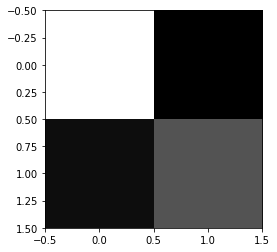

In [44]:
pipe = Pipeline([
    ('scaller', StandardScaler()), 
    ('svm', SVC())
    ])
evaluate_clf(pipe, X_train, y_train, X_test, y_test)

SVM MinMaxSCaller

TRAIN
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3718
           1       0.98      0.87      0.92      1504

    accuracy                           0.96      5222
   macro avg       0.97      0.93      0.95      5222
weighted avg       0.96      0.96      0.96      5222

TEST
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1245
           1       0.95      0.83      0.89       496

    accuracy                           0.94      1741
   macro avg       0.94      0.91      0.92      1741
weighted avg       0.94      0.94      0.94      1741

[[1223   22]
 [  84  412]]


array([0.88963211, 0.86181818, 0.87198516, 0.85137615, 0.86466165])

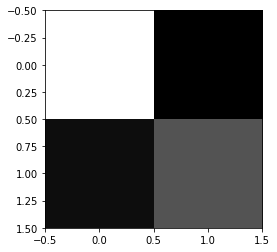

In [56]:
pipe = Pipeline([
    ('scaller', MinMaxScaler()), 
    ('svm', SVC())
    ])
evaluate_clf(pipe, X_train, y_train, X_test, y_test)
cross_val_score(pipe, X_train, y_train, cv=kf_5, scoring='f1')

In [53]:
pipe = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(pipe, param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.712 total time=   1.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.712 total time=   1.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.712 total time=   1.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.712 total time=   1.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.713 total time=   1.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.712 total time=   0.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.712 total time=   0.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.712 total time=   0.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.712 total time=   0.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.713 total time=   0.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.712 total time=   0.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [48]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.0001)


TRAIN
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3718
           1       0.97      0.90      0.93      1504

    accuracy                           0.96      5222
   macro avg       0.96      0.94      0.95      5222
weighted avg       0.96      0.96      0.96      5222

TEST
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1245
           1       0.93      0.85      0.89       496

    accuracy                           0.94      1741
   macro avg       0.93      0.91      0.92      1741
weighted avg       0.94      0.94      0.94      1741

[[1211   34]
 [  74  422]]


SVC(C=1000, gamma=0.0001)

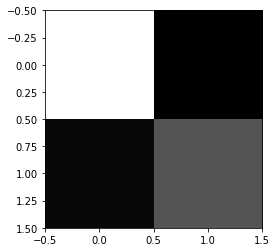

In [49]:
evaluate_clf(grid.best_estimator_, X_train, y_train, X_test, y_test)

In [50]:
cross_val_score(grid.best_estimator_, data_X_no5col, data_y, scoring='f1')

array([0.9001297 , 0.88051948, 0.88348271, 0.90288714, 0.88511749])

In [101]:
grid.best_estimator_.fit(data_X_no5col, data_y)

pipe.fit(data_X_no5col, data_y)
y_p = pipe.predict(data_predict_no5col)
df_output = pd.DataFrame({'target': y_p})
df_output.to_csv('a07_20220819_SVC.csv')
#scoring 0.9104143337066068 

## SVM 2. Grid Search

In [62]:
pipe = Pipeline([
    ('scaller', MinMaxScaler()), 
    ('svc', SVC(random_state=0))
    ])
    
evaluate_clf(pipe, X_train, y_train, X_test, y_test)

TRAIN
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3718
           1       0.98      0.87      0.92      1504

    accuracy                           0.96      5222
   macro avg       0.97      0.93      0.95      5222
weighted avg       0.96      0.96      0.96      5222

TEST
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1245
           1       0.95      0.83      0.89       496

    accuracy                           0.94      1741
   macro avg       0.94      0.91      0.92      1741
weighted avg       0.94      0.94      0.94      1741

[[1223   22]
 [  84  412]]


Pipeline(steps=[('scaller', MinMaxScaler()), ('svc', SVC(random_state=0))])

In [63]:
param_grid = {'svc__C': [0.1, 1, 10, 100, 1000],
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svc__kernel': ['rbf', 'poly', 'sigmoid']}
 
grid = GridSearchCV(pipe, param_grid, refit = True, verbose = 4, scoring='f1')
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf;, score=0.255 total time=   0.6s
[CV 2/5] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf;, score=0.270 total time=   0.5s
[CV 3/5] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf;, score=0.255 total time=   0.5s
[CV 4/5] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf;, score=0.285 total time=   0.5s
[CV 5/5] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf;, score=0.271 total time=   0.5s
[CV 1/5] END svc__C=0.1, svc__gamma=1, svc__kernel=poly;, score=0.863 total time=   0.2s
[CV 2/5] END svc__C=0.1, svc__gamma=1, svc__kernel=poly;, score=0.879 total time=   0.2s
[CV 3/5] END svc__C=0.1, svc__gamma=1, svc__kernel=poly;, score=0.838 total time=   0.2s
[CV 4/5] END svc__C=0.1, svc__gamma=1, svc__kernel=poly;, score=0.866 total time=   0.2s
[CV 5/5] END svc__C=0.1, svc__gamma=1, svc__kernel=poly;, score=0.854 total time=   0.2s
[CV 1/5] END svc__C=0.1, svc__gamma=1, svc__kernel=si

GridSearchCV(estimator=Pipeline(steps=[('scaller', MinMaxScaler()),
                                       ('svc', SVC(random_state=0))]),
             param_grid={'svc__C': [0.1, 1, 10, 100, 1000],
                         'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'svc__kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='f1', verbose=4)

In [65]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

evaluate_clf(grid.best_estimator_, X_train, y_train, X_test, y_test)
cross_val_score(grid.best_estimator_, X_train, y_train, scoring='f1')

{'svc__C': 10, 'svc__gamma': 1, 'svc__kernel': 'rbf'}
Pipeline(steps=[('scaller', MinMaxScaler()),
                ('svc', SVC(C=10, gamma=1, random_state=0))])
TRAIN
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3718
           1       0.98      0.93      0.95      1504

    accuracy                           0.97      5222
   macro avg       0.98      0.96      0.97      5222
weighted avg       0.97      0.97      0.97      5222

TEST
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1245
           1       0.93      0.86      0.89       496

    accuracy                           0.94      1741
   macro avg       0.94      0.92      0.93      1741
weighted avg       0.94      0.94      0.94      1741

[[1212   33]
 [  68  428]]


array([0.88307155, 0.89081456, 0.90189329, 0.91161179, 0.86772487])

## SVM and PCA

n_components = 0.95

In [83]:
pipe = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('scaller', MinMaxScaler()), 
    ('svc', SVC(random_state=0))
    ])
    
# evaluate_clf(pipe, X_train, y_train, X_test, y_test)


param_grid = {'svc__C': [0.1, 1, 10, 100, 1000],
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svc__kernel': ['rbf', 'poly', 'sigmoid']}

grid_search_pipe(pipe, param_grid,  X_train, y_train, X_test, y_test)

BEFORE GRID SEARHC
TRAIN
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      3718
           1       0.95      0.82      0.88      1504

    accuracy                           0.94      5222
   macro avg       0.94      0.90      0.92      5222
weighted avg       0.94      0.94      0.93      5222

TEST
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1245
           1       0.90      0.78      0.83       496

    accuracy                           0.91      1741
   macro avg       0.91      0.87      0.89      1741
weighted avg       0.91      0.91      0.91      1741

[[1202   43]
 [ 110  386]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits
BEST PARAMS: {'svc__C': 100, 'svc__gamma': 1, 'svc__kernel': 'rbf'}
BEST ESTIMATOR: Pipeline(steps=[('pca', PCA(n_components=0.95)), ('scaller', MinMaxScaler()),
                ('svc', SVC(C=100, gamma=1, random_state=0))])
BE

n_components = 0.99

In [82]:
pipe = Pipeline([
    ('pca', PCA(n_components=0.99)),
    ('scaller', MinMaxScaler()), 
    ('svc', SVC(random_state=0))
    ])
# evaluate_clf(pipe, X_train, y_train, X_test, y_test)

param_grid = {'svc__C': [0.1, 1, 10, 100, 1000],
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svc__kernel': ['rbf', 'poly', 'sigmoid']}

grid_search_pipe(pipe, param_grid, X_train, y_train, X_test, y_test)

BEFORE GRID SEARHC
TRAIN
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3718
           1       0.99      0.89      0.93      1504

    accuracy                           0.96      5222
   macro avg       0.97      0.94      0.95      5222
weighted avg       0.97      0.96      0.96      5222

TEST
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1245
           1       0.96      0.81      0.88       496

    accuracy                           0.94      1741
   macro avg       0.94      0.90      0.92      1741
weighted avg       0.94      0.94      0.93      1741

[[1229   16]
 [  95  401]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits
BEST PARAMS: {'svc__C': 1000, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
BEST ESTIMATOR: Pipeline(steps=[('pca', PCA(n_components=0.99)), ('scaller', MinMaxScaler()),
                ('svc', SVC(C=1000, gamma=0.1, random_state=0)

In [15]:
bpipe = Pipeline([
    ('pca', PCA(n_components=0.99)),
    ('scaller', MinMaxScaler()), 
    ('svc', SVC(random_state=0))
    ])
# evaluate_clf(pipe, X_train, y_train, X_test, y_test)

param_grid = {'svc__C': [0.1, 1, 10, 100, 1000, 5000, 10000],
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svc__kernel': ['rbf']}

grid_search_pipe(pipe, param_grid, X_train, y_train, X_test, y_test)

BEFORE GRID SEARHC
TRAIN
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3718
           1       0.99      0.89      0.93      1504

    accuracy                           0.96      5222
   macro avg       0.97      0.94      0.95      5222
weighted avg       0.97      0.96      0.96      5222

TEST
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1245
           1       0.96      0.81      0.88       496

    accuracy                           0.94      1741
   macro avg       0.94      0.90      0.92      1741
weighted avg       0.94      0.94      0.93      1741

[[1229   16]
 [  95  401]]
Fitting 5 folds for each of 35 candidates, totalling 175 fits
BEST PARAMS: {'svc__C': 1000, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
BEST ESTIMATOR: Pipeline(steps=[('pca', PCA(n_components=0.99)), ('scaller', MinMaxScaler()),
                ('svc', SVC(C=1000, gamma=0.1, random_state=0)

In [18]:
pipe = Pipeline([
    ('pca', PCA(n_components=0.99)),
    ('scaller', MinMaxScaler()), 
    ('svc', SVC(random_state=0))
    ])
# evaluate_clf(pipe, X_train, y_train, X_test, y_test)

param_grid = {'svc__C': [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500],
              'svc__gamma': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5],
              'svc__kernel': ['rbf']}

grid_search_pipe(pipe, param_grid, X_train, y_train, X_test, y_test)

BEFORE GRID SEARHC
TRAIN
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3718
           1       0.99      0.89      0.93      1504

    accuracy                           0.96      5222
   macro avg       0.97      0.94      0.95      5222
weighted avg       0.97      0.96      0.96      5222

TEST
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1245
           1       0.96      0.81      0.88       496

    accuracy                           0.94      1741
   macro avg       0.94      0.90      0.92      1741
weighted avg       0.94      0.94      0.93      1741

[[1229   16]
 [  95  401]]
Fitting 5 folds for each of 110 candidates, totalling 550 fits
BEST PARAMS: {'svc__C': 1400, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
BEST ESTIMATOR: Pipeline(steps=[('pca', PCA(n_components=0.99)), ('scaller', MinMaxScaler()),
                ('svc', SVC(C=1400, gamma=0.1, random_state=0

In [27]:
pipe = Pipeline([
    ('pca', PCA(n_components=0.99)),
    ('scaller', MinMaxScaler()), 
    ('svc', SVC(random_state=0))
    ])
# evaluate_clf(pipe, X_train, y_train, X_test, y_test)

param_grid = {'svc__C': np.arange(1300, 1500, 10),
              'svc__gamma': [0.1],
              'svc__kernel': ['rbf']}

grid_search_pipe(pipe, param_grid, X_train, y_train, X_test, y_test)

BEFORE GRID SEARHC
TRAIN
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3718
           1       0.99      0.89      0.93      1504

    accuracy                           0.96      5222
   macro avg       0.97      0.94      0.95      5222
weighted avg       0.97      0.96      0.96      5222

TEST
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1245
           1       0.96      0.81      0.88       496

    accuracy                           0.94      1741
   macro avg       0.94      0.90      0.92      1741
weighted avg       0.94      0.94      0.93      1741

[[1229   16]
 [  95  401]]
Fitting 5 folds for each of 20 candidates, totalling 100 fits
BEST PARAMS: {'svc__C': 1430, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
BEST ESTIMATOR: Pipeline(steps=[('pca', PCA(n_components=0.99)), ('scaller', MinMaxScaler()),
                ('svc', SVC(C=1430, gamma=0.1, random_state=0)

## SVM No My Code

In [13]:
pipe = Pipeline([
    ('scaller', MinMaxScaler()), 
    ('poly', PolynomialFeatures(interaction_only=True)),
    # ('pca', PCA(n_components=0.99)),
    ('svc', SVC(max_iter=20000, C=10))
    ])

evaluate_clf(pipe, X_train, y_train, X_test, y_test)

TRAIN
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3718
           1       0.99      0.95      0.97      1504

    accuracy                           0.98      5222
   macro avg       0.98      0.97      0.98      5222
weighted avg       0.98      0.98      0.98      5222

TEST
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1245
           1       0.92      0.87      0.89       496

    accuracy                           0.94      1741
   macro avg       0.94      0.92      0.93      1741
weighted avg       0.94      0.94      0.94      1741

[[1210   35]
 [  66  430]]


Pipeline(steps=[('scaller', MinMaxScaler()),
                ('poly', PolynomialFeatures(interaction_only=True)),
                ('svc', SVC(C=10, max_iter=20000))])